# Build the same using Tensorflow various variants low level, api, functional, model, builtin

## Synthetic Data Generation and Visualization

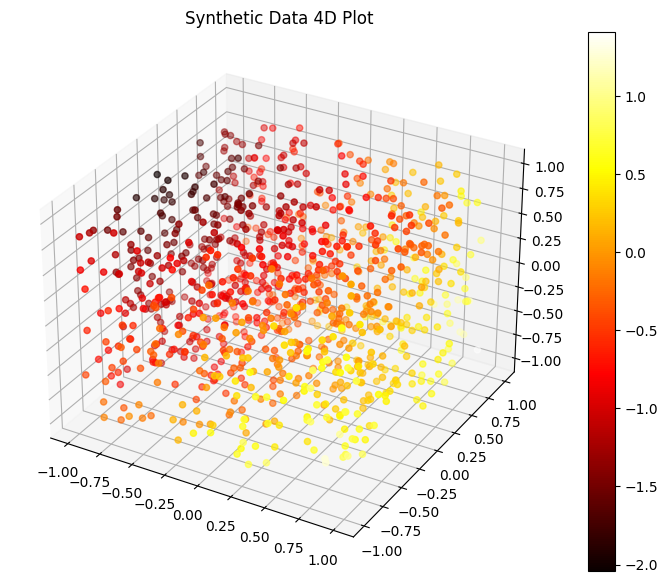

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data
np.random.seed(42)
x1 = np.random.uniform(-1, 1, 1000)
x2 = np.random.uniform(-1, 1, 1000)
x3 = np.random.uniform(-1, 1, 1000)
y = np.sin(x1) + x2**2 - np.log1p(np.exp(x3))

# 4D plot (using color to represent the fourth dimension)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(x1, x2, x3, c=y, cmap=plt.hot())
fig.colorbar(img)
plt.title("Synthetic Data 4D Plot")
plt.show()


## Creating the Model

In [4]:
import tensorflow as tf

class EinsumDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super(EinsumDense, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs):
        return self.activation(tf.einsum('ij,jk->ik', inputs, self.w) + self.b)

inputs = tf.keras.Input(shape=(3,))
x = EinsumDense(64, activation='relu')(inputs)
x = EinsumDense(64, activation='relu')(x)
outputs = EinsumDense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='mse')

# Convert the input data to a tensor
X = np.stack([x1, x2, x3], axis=1)
Y = y.reshape(-1, 1)

# Train the model
history = model.fit(X, Y, epochs=100, verbose=0)



## Plots

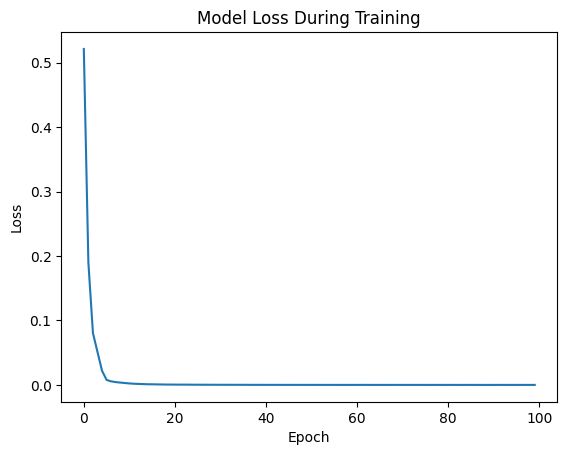

32/32 [==============================] - 0s 2ms/step


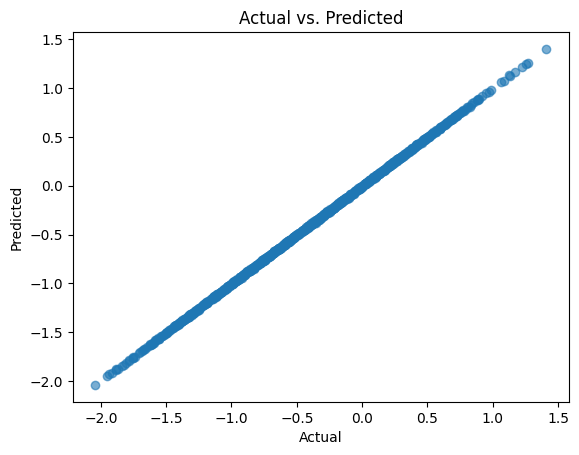

In [5]:
# Plot training loss vs. epochs
plt.plot(history.history['loss'])
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Predict and plot actual vs. predicted
y_pred = model.predict(X)
plt.scatter(Y, y_pred, alpha=0.6)
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()